# Ensemble Learning Exercise

## 1. Implementing Random Forest From Scratch (30 points)
In this exercise you will need to implement a simple version of Random Forest Regressor from scratch. Your model will handle **continuous input and output**. 

1.1. Compelete the skeleton class below (you should use scikit-learn's `DecisionTreeRegressor` model that the `TreeEnsemble` will use)
  - `X` is a matrix of data values (rows are samples, columns are attributes)
  - `y` is a vector of corresponding target values
  - `n_trees` is the number of trees to create
  - `sample_sz` is the size of the sample set to use of each of the trees in the forest (chose the samples randomly, with or without repetition)
  - `n_features` is the size of features to sample. This can be a natrual number > 0, or a ratio of the features as a number in range (0,1]
  - `min_leaf` is the minimal number of samples in each leaf node of each tree in the forest
  

1.2. The `predict` function will use mean of the target values of the trees. The result is a vector of predictions matching the number of rows in `X`.

1.3. The `oob_mse` function will compute the mean squared error over all **out of bag (oob)** samples. That is, for each sample calculate the squared error using  predictions from the trees that do not contain x in their respective bootstrap sample, then average this score for all samples. See:  [OOB Errors for Random Forests](https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html).

1.4. To check your random forest implementation, use the boston dataset (`from sklearn.datasets import load_boston`)

  - Use the following to estimate what are the best hyper parameters to use for your model
```
for n in [1,5,10,20,50,100]:
  for sz in [50,100,300,500]:
    for min_leaf in [1,5]:
      forest = TreeEnsemble(X, y, n, sz, min_leaf)
      mse = forest.oob_mse()
      print("n_trees:{0}, sz:{1}, min_leaf:{2} --- oob mse: {3}".format(n, sz, min_leaf, mse))
```
  
  - Using your chosen hyperparameters as a final model, plot the predictions vs. true values of all the samples in the training set . Use something like:
  ```
  y_hat = forest.predict(X)  # forest is the chosen model
  plt.scatter(y_hat, y)
  ```
 


In [62]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
class TreeEnsemble():
    def __init__(self, X, y, n_trees, sample_sz, n_features=1, min_leaf=1):
        self.X = X
        self.y = y 
        self.n_trees = n_trees
        self.sample_sz = sample_sz
        if n_features <= 1:
            self.n_features = round(X.shape[1] * n_features)
        else:
            self.n_features = n_features
        self.min_leaf = min_leaf
        self.trees = []
        self.oob_total_idxs = np.arange(X.shape[0])

        self._fit(X, y)


    def _fit(self, X, y):

        for _ in range(self.n_trees):
            
            # randomly choose raws for tree
            selected_raws = np.random.choice(X.shape[0], size=self.sample_sz, replace=True)
            selected_features = sorted(np.random.choice(X.shape[1], size=self.n_features, replace=False))

            inbag_sample = X[selected_raws][:,selected_features]
            inbag_target = y[selected_raws]

            # calculate raws in oob
            self.oob_total_idxs = np.setdiff1d(self.oob_total_idxs, selected_raws)
            
            tree = DecisionTreeRegressor(min_samples_leaf=self.min_leaf)
            
            # fit tree and save it in self.trees
            tree.fit(inbag_sample, inbag_target)
            self.trees.append(tree)

        #print(self.oob_total_idxs)


    def predict(self, X):
        
        # predict with each tree
        predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = predictions.mean(axis=0)
        
        return tree_preds


    def oob_mse(self):
        
        # check if there raws in oob
        if not self.oob_total_idxs.size:
            return "Out-of-bag set is empty"
        else:
            # oob set
            y_oob = self.y[self.oob_total_idxs]
            
            # make prediction and extract oob
            y_pred = self.predict(self.X)
            y_pred_oob = y_pred[self.oob_total_idxs]

            oob_mse = np.mean((y_oob - y_pred_oob) ** 2)
            
            return oob_mse



In [5]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]


In [6]:
for n in [1,5,10,20,50,100]:
  for sz in [50,100,300,500]:
    for min_leaf in [1,5]:
      forest = TreeEnsemble(X, y, n, sz, min_leaf=min_leaf)
      mse = forest.oob_mse()
      print("n_trees:{0}, sz:{1}, min_leaf:{2} --- oob mse: {3}".format(n, sz, min_leaf, mse))

n_trees:1, sz:50, min_leaf:1 --- oob mse: 34.31355119825707
n_trees:1, sz:50, min_leaf:5 --- oob mse: 30.611130669317646
n_trees:1, sz:100, min_leaf:1 --- oob mse: 27.25719806763285
n_trees:1, sz:100, min_leaf:5 --- oob mse: 43.4659784012084
n_trees:1, sz:300, min_leaf:1 --- oob mse: 16.736548042704623
n_trees:1, sz:300, min_leaf:5 --- oob mse: 28.14587558025355
n_trees:1, sz:500, min_leaf:1 --- oob mse: 16.666767676767673
n_trees:1, sz:500, min_leaf:5 --- oob mse: 33.937573996498735
n_trees:5, sz:50, min_leaf:1 --- oob mse: 17.087493589743588
n_trees:5, sz:50, min_leaf:5 --- oob mse: 23.84888906423116
n_trees:5, sz:100, min_leaf:1 --- oob mse: 20.611672131147543
n_trees:5, sz:100, min_leaf:5 --- oob mse: 26.192555907668694
n_trees:5, sz:300, min_leaf:1 --- oob mse: 5.796486956521736
n_trees:5, sz:300, min_leaf:5 --- oob mse: 13.332375888052404
n_trees:5, sz:500, min_leaf:1 --- oob mse: 2.8899999999999855
n_trees:5, sz:500, min_leaf:5 --- oob mse: 3.892370081335713
n_trees:10, sz:50, m

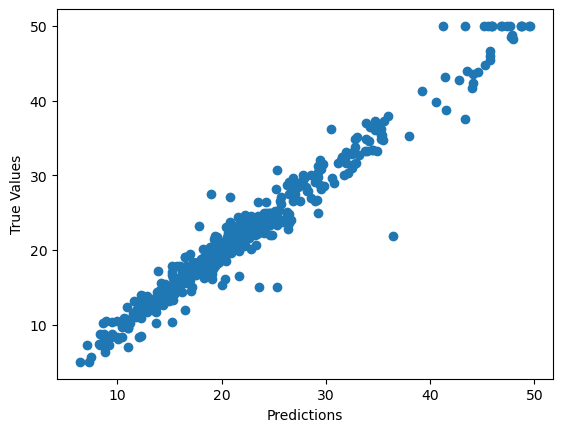

In [5]:
forest = TreeEnsemble(X, y, 20, 300, min_leaf=1)
y_hat = forest.predict(X) 
plt.scatter(y_hat, y)
plt.xlabel("Predictions")
plt.ylabel("True Values")
plt.show()

## 2. Implementing AdaBoost From Scratch (30 points)


2.1.   Implement the AdaBoost algorithm for classification task. Your `AdaBoost` class should receive a method for creating a weak learner, which has a fit and predict methods (**hint**: you can simulate re-weighting of the samples by an appropriate re-sampling of the train set).

2.2.   Use your model to find a strong classifier on the sample set given below, using $n$ weak learners:

2.2.1. For the base weak learners, use any classifier you want (check different types with different configuration, keep them simple = Weak). 

2.2.2. Split the sample set into train and test sets.

2.2.3 Plot the final decision plane of your classifier for $n\in \{1, 2, 3, 5, 10, 50\}$, and visualize the final iteration weights of the samples in those plots.
    - How does the overall train set accuracy changes with $n$?
    - Does you model starts to overfit at some point?





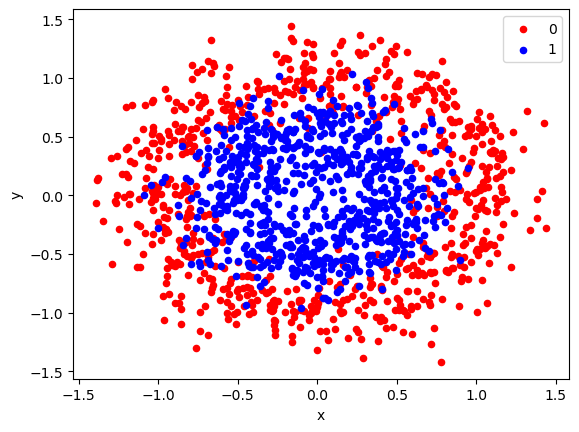

In [206]:
from sklearn.datasets import make_circles
from matplotlib import pyplot
from pandas import DataFrame

# generate 2d classification dataset
X, y = make_circles(n_samples=1500, noise=0.2, random_state=101, factor=0.5)

# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [243]:
from sklearn.tree import DecisionTreeClassifier

class AdaBooster():
    def __init__ (self, n_learners):
        self.n_learners = n_learners
        self.models = []
        self.alphas = []

    def fit(self, X, y):
        y_f = y.copy()
        y_f[y_f==0] = -1
        for i in range(self.n_learners):

            if i == 0: # equal weights for each entry
                w = np.ones(len(y_f)) * 1/(len(y_f))

            else: # update weights and normalize
                a_sign = [x if x>0 else -1 for x in np.not_equal(y_pred, y_f).astype('int')]
                w = w * np.exp(alpha * np.array(a_sign)) 
                # w = w * np.exp(alpha * y_f *  y_pred) 
                w = w / np.sum(w)                

                # create new sample set - the next 3 rows could be commented and 
                # the next stump could be created by sklearn DesisionTreeClassifier with the sample weight parameter
                # new_indices = np.random.choice(np.arange(len(X)), size=len(X), p=w)
                # X = X[new_indices]
                # y_f = y_f[new_indices]

            self.w = w
            tm = DecisionTreeClassifier(max_depth=1)
            tm.fit(X, y_f,sample_weight=w)
            y_pred = tm.predict(X)
            self.models.append(tm)

            err = self._total_err(w, y_f, y_pred)
            if err > 0.5:
                y_pred = y_pred * (-1)
            alpha = self._alpha(err)

            self.alphas.append(alpha)

    def _total_err(self, w, y, y_pred):
        return np.sum(w * np.not_equal(y, y_pred)) 
    
    def _alpha(self, err):
        return 0.5 * np.log((1-err)/(err + 1e-10))

    def predict(self, X):
        predictions = np.zeros(len(X))
        for m, a in zip(self.models, self.alphas):
            predictions += m.predict(X) * a
        res = np.vectorize(lambda x: 1 if x > 0 else 0)
        return res(predictions)



In [236]:
grouped

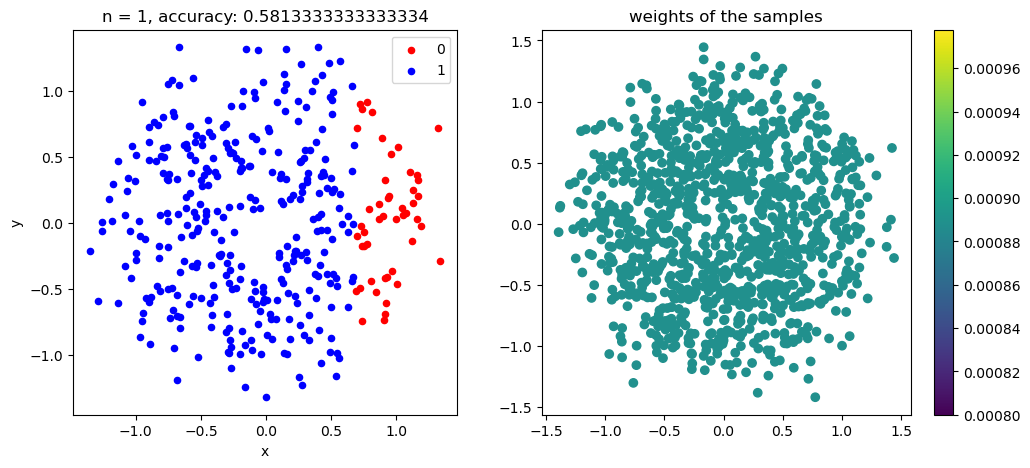

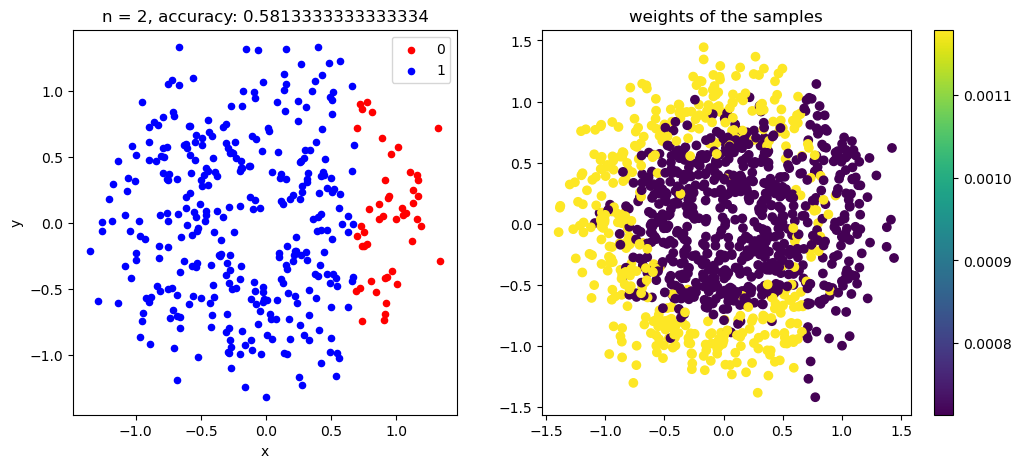

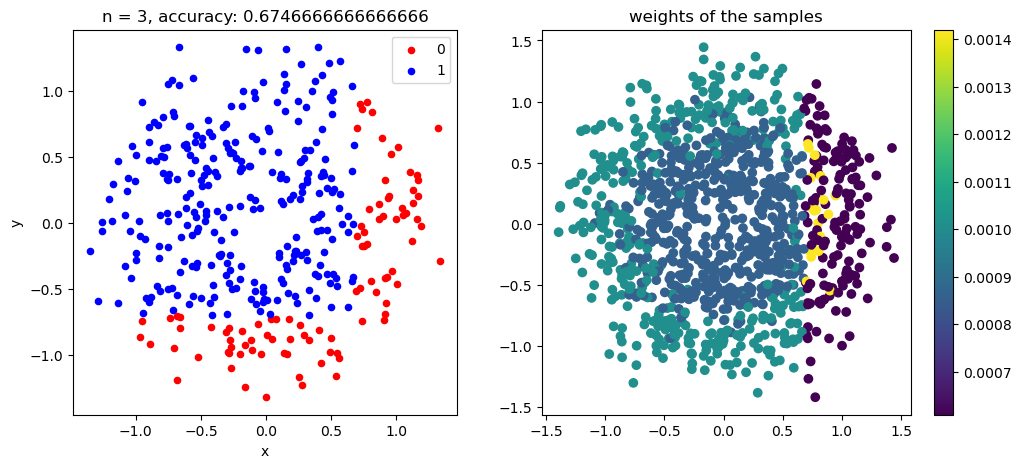

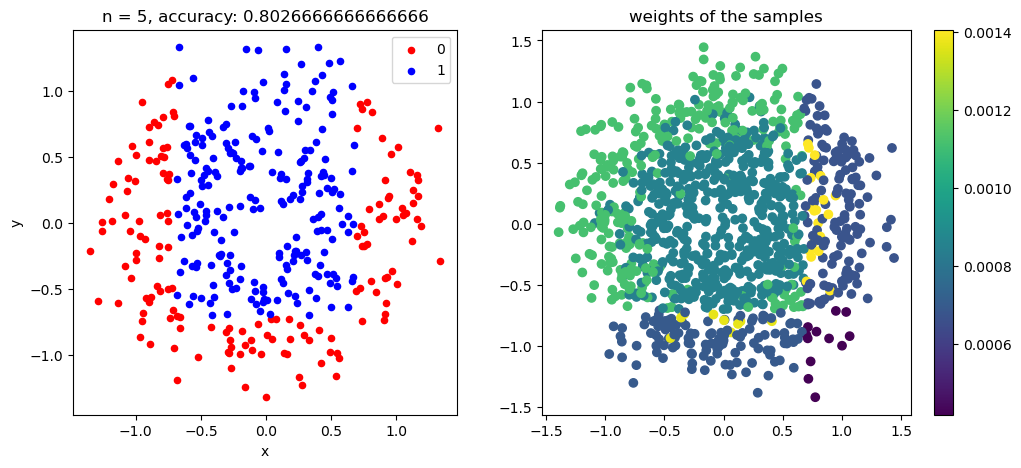

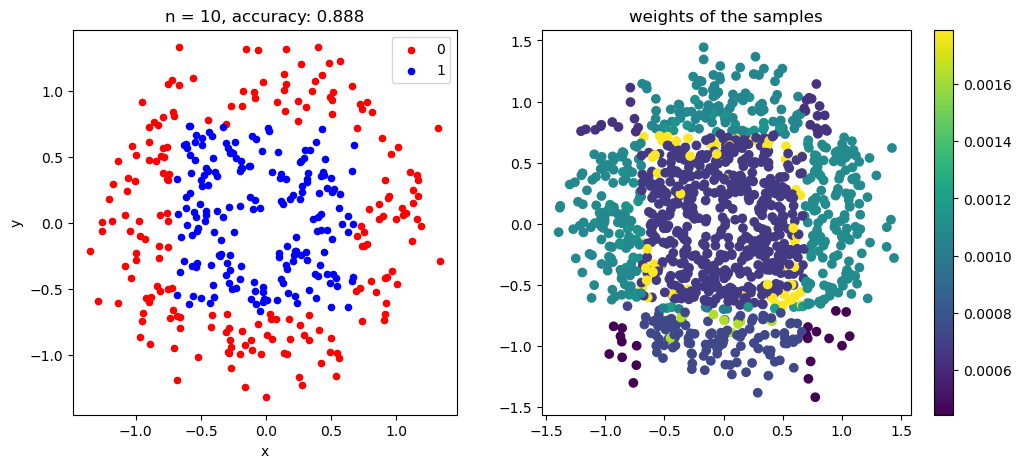

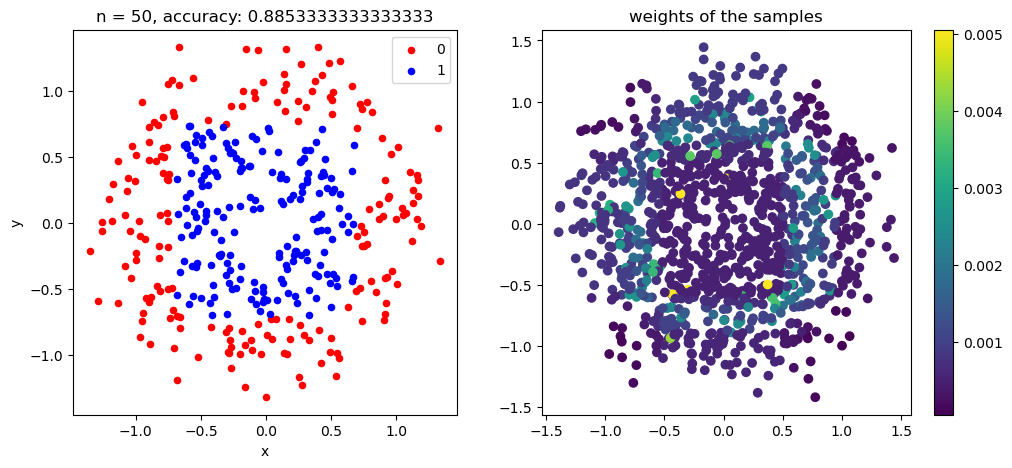

In [261]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 2.2.2. Split the sample set into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=29)

# 2.2.3 Plot the final decision plane of your classifier for $n\in \{1, 2, 3, 5, 10, 50\}$, 
# and visualize the final iteration weights of the samples in those plots.
for n in [1, 2, 3, 5, 10, 50]:
    tm = AdaBooster(n)
    tm.fit(X_train, y_train)
    y_pred = tm.predict(X_test)
    # print('accuracy:', accuracy_score(y_test, y_pred))
    # scatter plot, dots colored by class value
    df = DataFrame(dict(x=X_test[:,0], y=X_test[:,1], label=y_pred))
    colors = {0:'red', 1:'blue'}
    # fig, ax = pyplot.subplots()

    fig, axs = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [1, 1.2]})


    ax = axs[0]
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    ax.set_title(f'n = {n}, accuracy: {accuracy_score(y_test, y_pred)}')

    ax = axs[1]
    sc = plt.scatter(x=X_train[:,0], y=X_train[:,1], c=tm.w)
    plt.title('weights of the samples')
    plt.colorbar(sc, ax=ax)    
    pyplot.show()

## 3. Boosting Trees from Scratch (40 points)
1. Use the scikit-learn's DecisionTreeRegressor (again :) with `max_depth = 1` (stumps)  to write a L2Boost model which minimize the L2 square loss iteration by iteration.
Reminder: in each step, build a decision tree to minimize the error between the true label and the accumulated (sum) of the previous step predictions.
![alt text](https://explained.ai/gradient-boosting/images/latex-321A7951E78381FB73D2A6874916134D.svg)
2. Use the Boston dataset to plot the MSE as a function of the number of trees for a logspace of `n_trees` up to 1,000. What is the optimal value of `n_trees`? of learning rate?
3. Compare the performance with a deep DecisionTreeRegressor (find the optimal `max_depth`).  Who wins?
4. Add an early-stopping mechanisim to the GBTL2 model to use a validation set to detect over-fit.

In [52]:
class L2Boost():
    def __init__(self, X, y, n_trees, eta):
        self.y = y
        self.n_trees = n_trees
        self.eta = eta
        #self.f = np.zeros_like(y)
        
        self.f = self._fit(X, y)

    def _fit(self, X, y):

        for m in range(self.n_trees):
            if m == 0:
                f = np.mean(y)

            else:
                r = y - f
                tree = DecisionTreeRegressor(max_depth=1)
                tree.fit(X, r)
                r_pred = tree.predict(X)
                f += self.eta * r_pred
        return f


    def mse(self):
        mse = np.mean((self.y - self.f) ** 2)
        return mse


In [53]:
X = np.array([[1,5], [2,3], [3,2], [4,6], [4,7], [5,9], [6,5], [6,7], [8,5], [8,8]])
y = np.array([1,1,0,0,1,1,0,1,0,0])
model = L2Boost(X, y, 200, 0.05)
model.mse()


0.028808402304008756

In [54]:
# load boston
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

In [55]:
# Define the range of number of trees
n_trees_range = np.logspace(0, 3, num=50, dtype=int)

mse_values = []

for n_trees in n_trees_range:
    model = L2Boost(X, y, n_trees, 0.05)
    mse_values.append(model.mse())


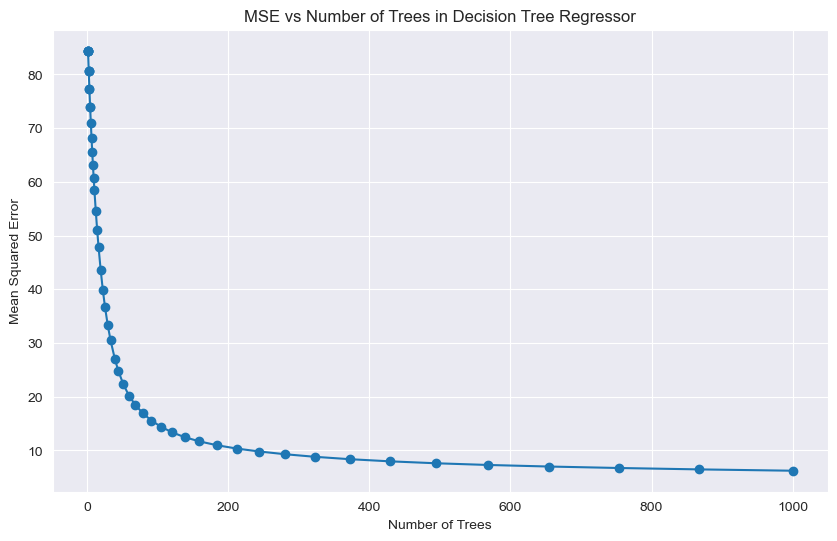

In [61]:
# Plotting the MSE as a function of the number of trees
plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')
plt.plot(n_trees_range, mse_values, marker='o', linestyle='-')
#plt.xscale('log')
plt.title('MSE vs Number of Trees in Decision Tree Regressor')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

In [74]:
# Define the range of learning rate
eta_range = np.arange(0.001, 2, 0.05)
n_trees=100
mse_values = []

for eta in eta_range:
    model = L2Boost(X, y, n_trees, eta)
    mse_values.append(model.mse())

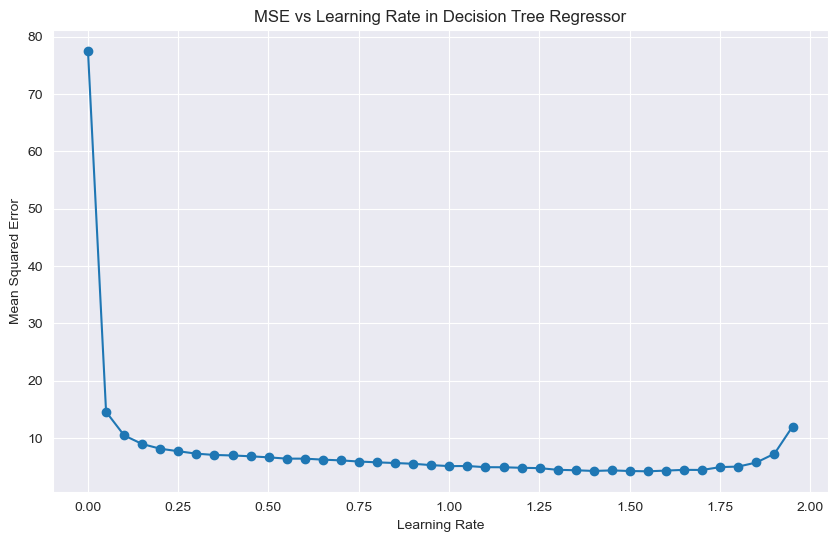

In [75]:
# Plotting the MSE as a function of the number of trees
plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')
plt.plot(eta_range, mse_values, marker='o', linestyle='-')
#plt.xscale('log')
plt.title('MSE vs Learning Rate in Decision Tree Regressor')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()